# Plotting multispectral data

Multispectral data can be plotted as:

1.  Individual bands
2.  Spectral indices
3.  True color 3-band images
4.  False color 3-band images

Spectral indices and false color images can both be used to enhance
images to clearly show things that might be hidden from a true color
image, such as vegetation health.

In [1]:
%store -r band_dict ndvi_da denver_redlining_gdf ndbi_da

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import libraries</div></div><div class="callout-body-container callout-body"><p>Add missing libraries to the imports</p></div></div>

In [2]:
import cartopy.crs as ccrs # CRSs (Coordinate Reference Systems)
import hvplot.pandas # Interactive tabular and vector data
import hvplot.xarray # Interactive raster
import matplotlib.pyplot as plt # Overlay pandas and xarry plots
import numpy as np # Adjust images
import xarray as xr # Adjust images

There are many different ways to represent geospatial coordinates,
either spherically or on a flat map. These different systems are called
Coordinate Reference Systems.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare to plot</div></div><div class="callout-body-container callout-body"><p>To make interactive geospatial plots, at the moment we need
everything to be in the Mercator CRS.</p>
<ol type="1">
<li>Reproject your area of interest with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Reproject your NDVI and band raster data using
`.rio.reproject(ccrs.Mercator())</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with xarray</div></div><div class="callout-body-container callout-body"><p>Plotting raster and vector data together using <code>pandas</code>
and <code>xarray</code> requires the <code>matplotlib.pyplot</code>
library to access some plot layour tools. Using the code below as a
starting point, you can play around with adding:</p>
<ol type="1">
<li>Labels and titles</li>
<li>Different colors with <code>cmap</code> and
<code>edgecolor</code></li>
<li>Different line thickness with <code>line_width</code></li>
</ol>
<p>See if you can also figure out what <code>vmin</code>,
<code>robust</code>, and the <code>.set()</code> methods do.</p></div></div>

*vmin: sets the minimum... if none is set it goes to the default. It's partner so to speak is vmax.

*robust: typically indicates that the plot will be generated using a method that is less sensitive
 to outliers in the data.Often by employing a robust statistical technique like robust regression, 
 which downplays the influence of extreme values when calculating the line of best fit or other 
 summary statistics displayed on the plot.

*.set(): used to create a set object. A set is an unordered collection of unique elements.
It's like a list, but it doesn't allow duplicate values.
Sets are useful for performing mathematical operations like union, intersection, and difference.
You pass an iterable (like a list, tuple, or string) to the set() function.
It creates a new set containing the unique elements from the iterable.

*cmap: can use this to change the color ranges, there are a lot of options available
and would need to be looked at before choosing, some are more straight forward like 
'greens' (sequential color maps) and then there's ones like 'viridis' or 'inferno'
(perceptually uniform sequential color maps) and others that are cyclical, divergent,
qualitative, etc. That would depend on what I'm doing with the data and what type
of data I am using.

*edgecolor: a parameter used to control the color of the edges of various plot elements, 
such as bars, patches, and lines. To change it need to specify the color, could be white,
green, black, blue, etc. depends on what my background or cmap is and what would create
the most contrast for an edgecolor to be able to visually see. 

*line_width: this changes the size of a line, I can see we used it in hvplot, but
when I used it in .plot() it didn't work I think linewidth without the underscore
is what .plot() uses.

*xticks and yticks set the tick marks along the axes, if you leave the brackets 
blank it removes the ticks



In [3]:
# Prepare the Plot 
# Reproject Denver to Mercator
redlining_plot_gdf = denver_redlining_gdf.to_crs(ccrs.Mercator())

# Reproject NDVI data and band raster data to Mercator
ndvi_plot_da = ndvi_da.rio.reproject(ccrs.Mercator())

# Reproject band_dict by creating for loop
band_plot_dict = {
    name: da.rio.reproject(ccrs.Mercator())
    for name, da in band_dict.items()
    }

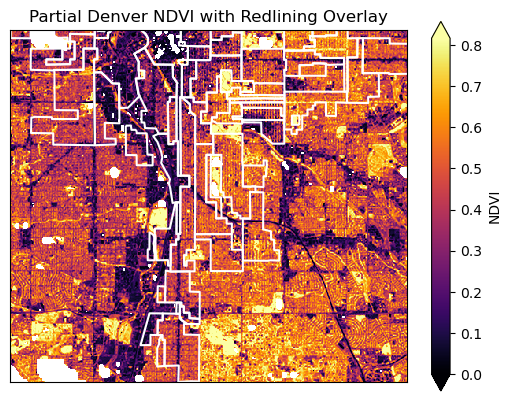

In [4]:
# Plot raster with overlay xarray
ndvi_plot_da.plot(
    vmin=0,
    robust=True,
    cmap='inferno',
    cbar_kwargs={"label": "NDVI"}
    )

redlining_plot_gdf.plot(
    ax=plt.gca(), 
    color='none',
    edgecolor='white',
    linewidth=1.5
    ) 
                        
plt.gca().set(
    title='Partial Denver NDVI with Redlining Overlay', 
    xlabel='',
    ylabel='',
    xticks=[], 
    yticks=[],
    )
    
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with hvplot</div></div><div class="callout-body-container callout-body"><p>Now, do the same with <code>hvplot</code>. Note that some parameter
names are the same and some are different. Do you notice any physical
lines in the NDVI data that line up with the redlining boundaries?</p></div></div>

*Maybe some of the physical lines I see, which are mostly road, river 
or outlines of parks, do line up with the redlinging boundaries. The 
Wash Park outline is particularly stark

In [11]:
# Create interactive NDVI plot
(
    ndvi_plot_da.hvplot(
        robust=True,
        geo=True,
        xaxis=None, 
        yaxis=None,
        title='Interactive Partial Denver NDVI with Redlining Overlay',
        cmap='Oranges',
        clabel='NDVI'
    )
    * redlining_plot_gdf.hvplot(
        geo=True,
        crs=ccrs.Mercator(),
        fill_color=None,
        line_width=2.5,
        width=500
        )
)

:Overlay
   .Image.I    :Image   [x,y]   (value)
   .Polygons.I :Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot bands with linked subplots</div></div><div class="callout-body-container callout-body"><p>The following code will make a three panel plot with Red, NIR, and
Green bands. Why do you think we aren’t using the green band to look at
vegetation?</p></div></div>

*We aren't using the green band to look at vegetation because the parks or 
vegetation don't show up well on the green band, but they do show up well
on the nir band.

In [55]:
# Make interactive plots for red, nir, and green bands

raster_kwargs = dict(
    geo=True, robust=True, 
    xaxis=None, yaxis=None
)
(
    (
        band_plot_dict['red'].hvplot(
            cmap='Reds', title='Red Band Reflectance', clabel='Reflectance',
            **raster_kwargs)
        + band_plot_dict['nir'].hvplot(
            cmap='Greys', title='NIR Band Reflectance', clabel='Reflectance',
            **raster_kwargs)
        + band_plot_dict['green'].hvplot(
            cmap='Greens', title='Green Band Reflectance', clabel='Reflectance',
            **raster_kwargs)
    )
    * redlining_plot_gdf.hvplot(
        geo=True, 
        crs=ccrs.Mercator(),
        fill_color=None
        )
)

:Layout
   .Overlay.I   :Overlay
      .Image.I    :Image   [x,y]   (Red)
      .Polygons.I :Polygons   [Longitude,Latitude]
   .Overlay.II  :Overlay
      .Image.I    :Image   [x,y]   (NIR)
      .Polygons.I :Polygons   [Longitude,Latitude]
   .Overlay.III :Overlay
      .Image.I    :Image   [x,y]   (Green)
      .Polygons.I :Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot RBG</div></div><div class="callout-body-container callout-body"><p>The following code will plot an RGB image using both matplotlib and
hvplot. It also performs an action called “Contrast stretching”, and
brightens the image.</p>
<ol type="1">
<li>Read through the <code>stretch_rgb</code> function, and fill out the
<strong>docstring</strong> with the rest of the parameters and your own
descriptions. You can ask ChatGPT or another LLM to help you read the
code if needed! Please use the <a
href="https://numpydoc.readthedocs.io/en/latest/format.html">numpy style
of docstrings</a></li>
<li>Adjust the <code>low</code>, <code>high</code>, and
<code>brighten</code> numbers until you are satisfied with the image.
You can also ask ChatGPT to help you figure out what adjustments to make
by describing or uploading an image.</li>
</ol></div></div>

In [59]:
# Define the rgb data array
rgb_da = (
    xr.concat(
        [
            band_plot_dict['red'],
            band_plot_dict['green'],
            band_plot_dict['blue']
        ],
        dim='rgb')
)

# Use the stretch_rgb function with parameters and make descriptions
def stretch_rgb(rgb_da, low, high, brighten):
    """
    Short description: 
    Default images are too light/dark, stretch_rgb() can increase the visual contrast and brighten the image.

    Long description:
    Applies a linear stretch based on the low and high values, which are used as the endpoints.

    Parameters
    ----------
    rgb_da: array-like
      Single da with red, green, and blue band with 'rgb' dimension defined prior to using function
    low: float or int
      Sets the low percentile endpoint for the stretch. The lower the percentile, the lighter the image.
    high: float or int
      Sets the high percentile endpoint for the stretch. The higher the percentile, the darker the image.
    brighten: float 
      Brightens the image, range is from 0-1 with 0 being no added brightness and 1 being full brightness.
  
    Returns
    -------
    rgb_da: array-like
      Outliers in brightness taken out of da - 'streched' image
    """
    # Adjust low, high and brighten numbers as needed
    p_low, p_high = np.nanpercentile(rgb_da, (low, high))
    rgb_da = (rgb_da - p_low)  / (p_high - p_low) + brighten
    rgb_da = rgb_da.clip(0, 1)
    return rgb_da

rgb_da = stretch_rgb(rgb_da, 3, 96, .1)

#rgb_da.plot.imshow(
    #rgb='rgb',
    #x:None, 
    #y:None,
    #title='True Color (3 band) Denver Image'
    #)
rgb_da.hvplot.rgb(
    geo=True, 
    x='x', 
    y='y', 
    bands='rgb',
    xaxis=None, 
    yaxis=None,
    title='True Color (3 band) Partial Denver Image'
 )

:RGB   [x,y]   (R,G,B)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot CIR</div></div><div class="callout-body-container callout-body"><p>Now, plot a false color RGB image. CIR images have the following
bands:</p>
<ul>
<li>red becomes NIR</li>
<li>green becomes red</li>
<li>blue becomes green</li>
</ul></div></div>



<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Adjust the levels</div></div><div class="callout-body-container callout-body"><p>You may notice that the NIR band in this image is very bright. Can
you adjust it so it is balanced more effectively by the other bands?</p></div></div>

In [8]:
# Define the rgb data array
cir_da = (
    xr.concat(
        [
            band_plot_dict['nir'] * .5,
            band_plot_dict['red'],
            band_plot_dict['green']
        ],
        dim='rgb')
)

cir_da = stretch_rgb(cir_da, 3, 96, .1)

#cir_da.plot.imshow(rgb='rgb')
cir_da.hvplot.rgb(
    geo=True, 
    x='x', 
    y='y', 
    bands='rgb',
    xaxis=None, 
    yaxis=None,
    title='False Color (3 band) Partial Denver Image',
    )

:RGB   [x,y]   (R,G,B)